In [1]:
!kaggle datasets download harishkumardatalab/food-image-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/harishkumardatalab/food-image-classification-dataset
License(s): CC0-1.0
100% 1.68G/1.68G [00:30<00:00, 59.7MB/s]
100% 1.68G/1.68G [00:30<00:00, 58.9MB/s]


In [2]:
import zipfile

import os
import cv2
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [3]:
with zipfile.ZipFile('food-image-classification-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('food-image-classification-dataset')

In [4]:
!ls 'food-image-classification-dataset/Food Classification dataset'

 apple_pie	 cheesecake	   Donut        jalebi	       omelette     Sandwich
'Baked Potato'	 chicken_curry	   fried_rice   kaathi_rolls   paani_puri   sushi
 burger		 chole_bhature	   Fries        kadai_paneer   pakode	    Taco
 butter_naan	'Crispy Chicken'  'Hot Dog'     kulfi	       pav_bhaji    Taquito
 chai		 dal_makhani	   ice_cream    masala_dosa    pizza
 chapati	 dhokla		   idli         momos	       samosa


In [6]:
# Read images

dataset_path = 'food-image-classification-dataset/Food Classification dataset'

X = []
y = []

food_folders = os.listdir(dataset_path)

img_count = 0

for food_label in food_folders:
  folder_path = os.path.join(dataset_path, food_label)
  if os.path.isdir(folder_path):
    for image_name in os.listdir(folder_path):
      image_path = os.path.join(folder_path, image_name)
      image = cv2.imread(image_path)
      image = cv2.resize(image, (224, 224))
      X.append(image)
      y.append(food_label)
      img_count += 1

X = np.array(X)
y = np.array(y)

print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (23873, 224, 224, 3)
y shape: (23873,)


In [7]:
# Encode the labels as integers

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (23873, 224, 224, 3)
y shape: (23873,)


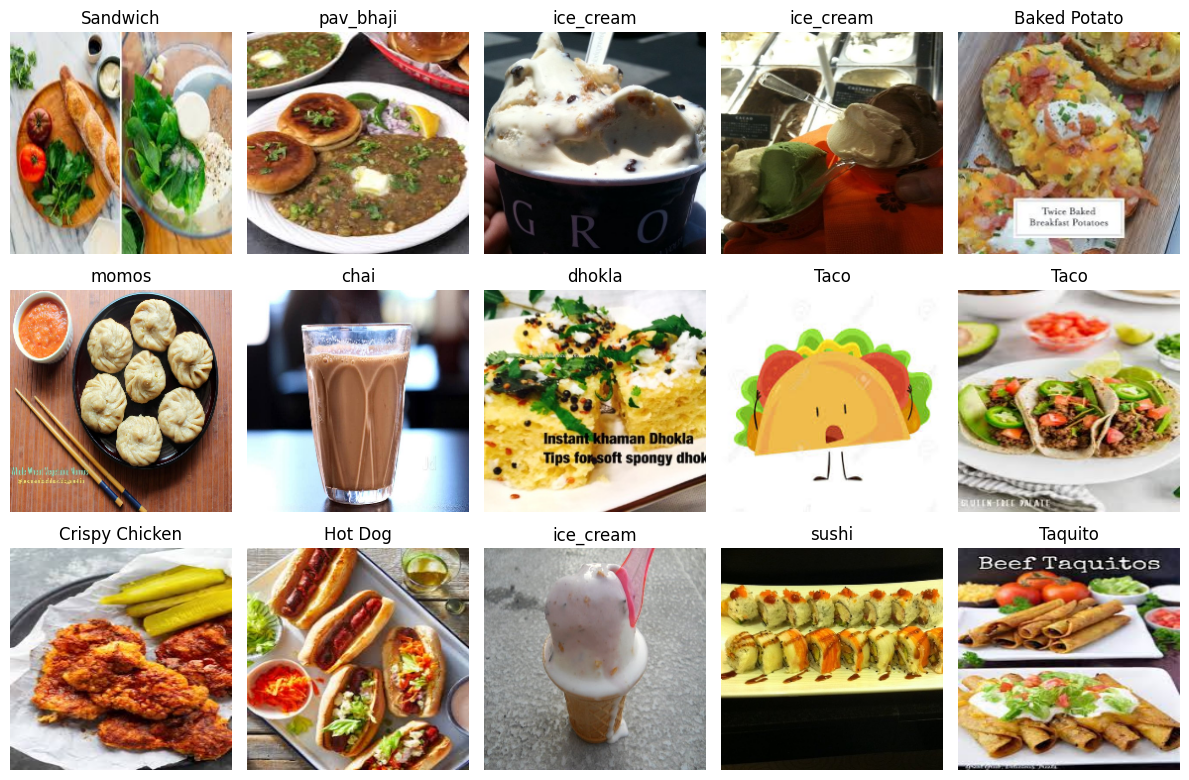

In [13]:
# Show 15 random images

random_indices = random.sample(range(len(X)), 15)

plt.figure(figsize=(12, 8))

for i, idx in enumerate(random_indices):
  plt.subplot(3, 5, i + 1)
  plt.imshow(cv2.cvtColor(X[idx], cv2.COLOR_BGR2RGB))
  plt.title(label_encoder.inverse_transform([y[idx]])[0])
  plt.axis('off')

plt.tight_layout()
plt.show()

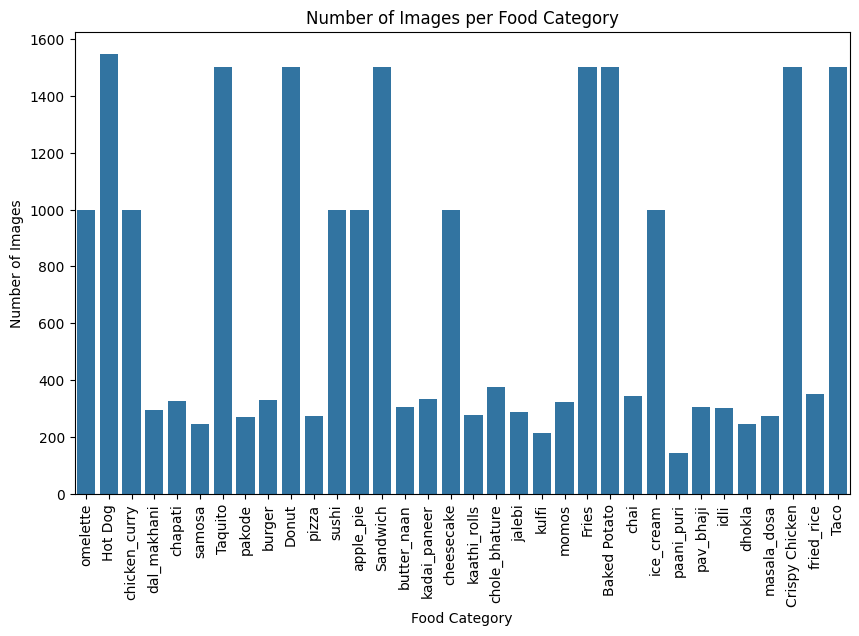

In [9]:
# Plot the number of images per food category

label_counts = Counter(y)

food_labels = label_encoder.inverse_transform(list(label_counts.keys()))
image_counts = list(label_counts.values())

plt.figure(figsize=(10, 6))
sns.barplot(x=food_labels, y=image_counts)
plt.xticks(rotation=90)
plt.xlabel('Food Category')
plt.ylabel('Number of Images')
plt.title('Number of Images per Food Category')
plt.show()

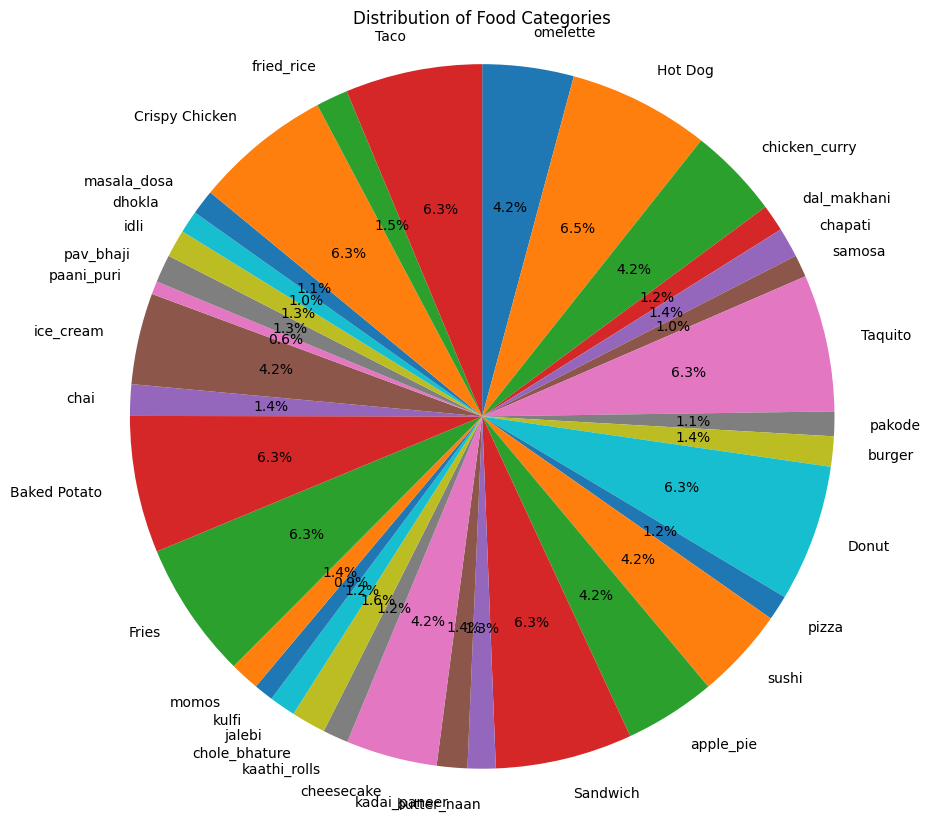

In [10]:
# Create a pie chart
plt.figure(figsize=(10, 10))
plt.pie(image_counts, labels=food_labels, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Distribution of Food Categories')
plt.axis('equal')
plt.show()